In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
data['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [13]:
# balanced dataset

C:\Users\nkumar3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


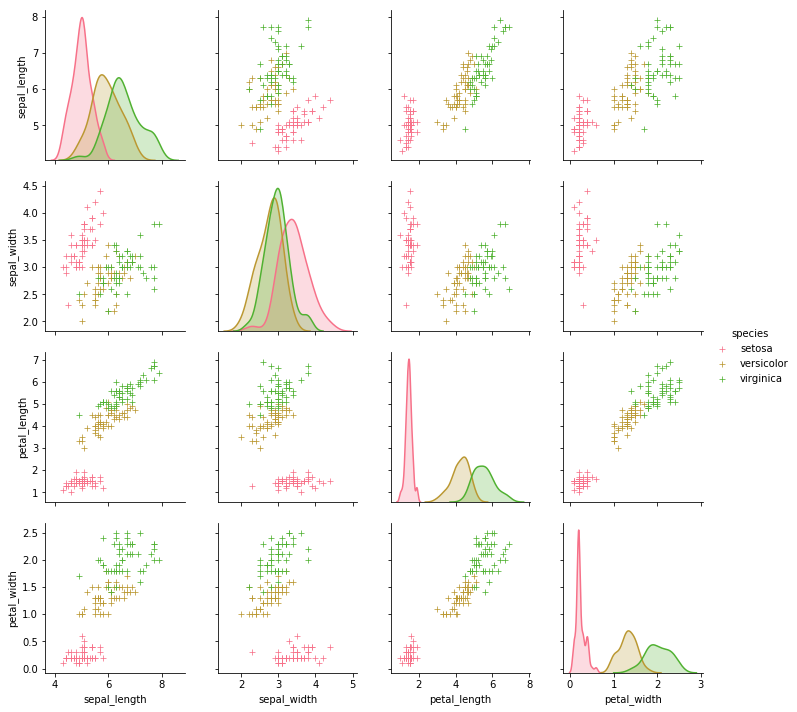

In [15]:
import seaborn as sns
sns.set_palette('husl')
sns.pairplot(data, hue='species', markers='+')

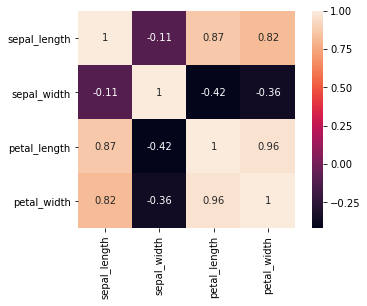

In [22]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

In [16]:
X = data.drop(['species'], axis=1)
y = data['species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [21]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [19]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [26]:
reg.predict(X_train)

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa'

In [25]:
import pickle

filename = 'irispredict.pkl'
pickle.dump(reg, open(filename, 'wb'))


In [28]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9833333333333333


In [30]:
reg.predict([[1,1,1,1]])

array(['setosa'], dtype=object)

In [34]:
sepLength = float(input("Input Sepal Length:"))
sepWidth = float(input("Input Sepal Width:"))
petLength = float(input("Input Petal Length:"))
petWidth = float(input("Input Sepal Width:"))

print(sepLength,sepWidth,petLength, petWidth)

Input Sepal Length:1
Input Sepal Width:2
Input Petal Length:3
Input Sepal Width:4
1.0 2.0 3.0 4.0
